Ref: [IBM Quantum Cloud Documentation | Hello World](https://quantum.cloud.ibm.com/docs/en/tutorials/hello-world)

Submitted by: Sam Ruben Abraham, 2023BCD0002

## Installations

In [18]:
!pip -q install qiskit
!pip -q install qiskit-ibm-runtime
!pip -q install qiskit[visualization]
!pip -q install pylatexenc # umm not required ig??


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [2]:
!pip list | grep qiskit

qiskit                             2.1.2
qiskit-aer                         0.17.1
qiskit-ibm-runtime                 0.41.1


In [3]:
!pip list | grep pylatexenc

pylatexenc                         2.10


## Circuit Setup

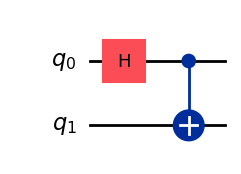

In [4]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
 
# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

## Loading Some Observables For Us to Graph

In [ ]:
# Set up six different observables.
 
observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

## Loading Up The IBM Quantm Runtime

In [11]:
import json
_token = json.load(open('apikey.json'))['apikey']

In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService

QiskitRuntimeService.save_account(
channel="ibm_quantum_platform",
token=_token,
set_as_default=True
)

### Test If It Works

In [13]:
service = QiskitRuntimeService()
print([b.name for b in service.backends()])

qiskit_runtime_service._resolve_cloud_instances:WARNING:2025-09-25 12:28:37,521: Default instance not set. Searching all available instances.


['ibm_brisbane', 'ibm_torino']


In [14]:
QiskitRuntimeService.saved_accounts()

{'default-ibm-quantum-platform': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'E5ncvH1yxB9iOHanqW56I6SDgDs9lqaWBTUj-mhj0xar',
  'verify': True,
  'private_endpoint': False}}

## Acquiring a Backend for The Rest of The Example

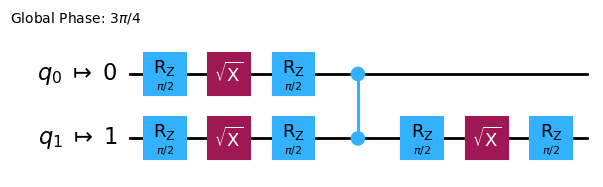

In [16]:
backend = service.least_busy(simulator=False, operational=True) # uses the least busy server to optimize the circuit
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
isa_circuit.draw("mpl", idle_wires=False)

## Execution!!

In [17]:
# Construct the Estimator instance.
 
estimator = Estimator(mode=backend)
estimator.options.resilience_level = 1
estimator.options.default_shots = 5000
 
mapped_observables = [
    observable.apply_layout(isa_circuit.layout) for observable in observables
]
 
# One pub, with one circuit to run against five different observables.
job = estimator.run([(isa_circuit, mapped_observables)])
 
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: d3aeli6lahfs739uvoj0


## Results Time!!

In [20]:
# This is the result of the entire submission.  You submitted one Pub,
# so this contains one inner result (and some metadata of its own).
job_result = job.result()
 
# This is the result from our single pub, which had six observables,
# so contains information on all six.
pub_result = job.result()[0]

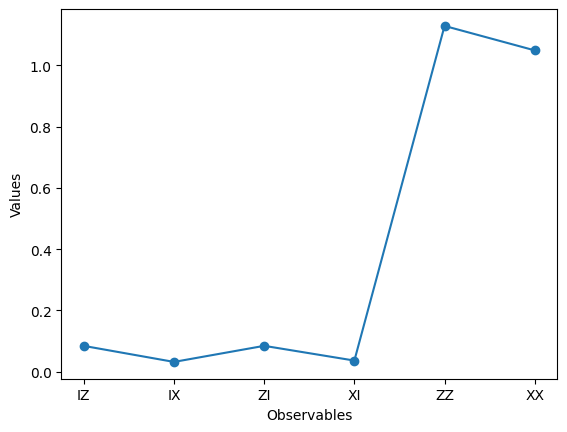

In [21]:
# Plot the result
 
from matplotlib import pyplot as plt
 
values = pub_result.data.evs
 
errors = pub_result.data.stds
 
# plotting graph
plt.plot(observables_labels, values, "-o")
plt.xlabel("Observables")
plt.ylabel("Values")
plt.show()

Notice that for qubits $0$ and $1$, the independent expectation values of both $X$ and $Z$ are $0$, while the correlations ($XX$ and $ZZ$) are $1$. This is a hallmark of quantum entanglement. - Conclusion from the Hello World program